In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import json
from pprint import pprint

def save_fig(fig, name):
    fig.savefig("graphs/{}.png".format(name), format="png", dpi=500)
    fig.savefig("graphs/{}.pdf".format(name), format="pdf", dpi=500)

In [2]:
def load_json(path):
    with open(path) as f:
        data = json.load(f)
    
    timings = [];
    for d in data["datapoints"]:
        s = d["setting"]
        time = list(map(lambda x: (x["computationTime"], x['iterationCount'], x["pixelCount"]),
                       sorted(d["data"]["workers"], key=lambda x: x["rank"])))
        timings.extend(time)
    
    return timings

/Users/databook/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/databook/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/Users/databook/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/databook/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/databook/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/Users/databook/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


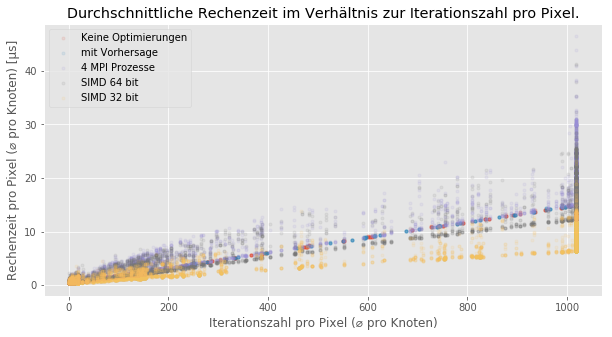

In [3]:
base = load_json("./data/data_sum_base_case.json")
prediction = load_json("./data/data_sum_prediction.json")
mpi = load_json("./data/data_sum_prediction_MPI.json")
simd = load_json("./data/data_sum_prediction_MPI_SIMD.json")
simd32 = load_json("./data/data_sum_prediction_MPI_SIMD_32bit.json")


labels = ["Keine Optimierungen", "mit Vorhersage", "4 MPI Prozesse", "SIMD 64 bit", "SIMD 32 bit"]

base_time, base_it, base_px = zip(*base)
prediction_time, prediction_it, prediction_px = zip(*prediction)
mpi_time, mpi_it, mpi_px = zip(*mpi)
simd_time, simd_it, simd_px = zip(*simd)
simd32_time, simd32_it, simd32_px = zip(*simd32)



data = [
    (np.asarray(base_it)/np.asarray(base_px), (np.asarray(base_time)/np.asarray(base_px))),
    (np.asarray(prediction_it)/np.asarray(prediction_px), (np.asarray(prediction_time)/np.asarray(prediction_px))),
    (np.asarray(mpi_it)/np.asarray(mpi_px), (np.asarray(mpi_time)/np.asarray(mpi_px))),
    (np.asarray(simd_it)/np.asarray(simd_px), (np.asarray(simd_time)/np.asarray(simd_px))),
     (np.asarray(simd32_it)/np.asarray(simd32_px), (np.asarray(simd32_time)/np.asarray(simd32_px)))

]

base_x = np.asarray(base_it)/np.asarray(base_px)
base_time = (np.asarray(base_time)/np.asarray(base_px))

fig, line = plt.subplots(figsize=(10,5))
for i, d in enumerate(data):
    line.plot(d[0], d[1], label=labels[i], lw=0, marker=".", alpha=.1)

line.legend()


line.set(xlabel='Iterationszahl pro Pixel (⌀ pro Knoten)', ylabel='Rechenzeit pro Pixel (⌀ pro Knoten) [µs]',
       title='Durchschnittliche Rechenzeit im Verhältnis zur Iterationszahl pro Pixel.')
line.grid(True)
#line.axis([0, None, 0, 0.04])


# TODO instead: show higher simd overhead => line fit
# plt.yscale('log')
save_fig(fig, "overall")
plt.show()
